# This is emotion detection from "C:\Users\Swata\Downloads\emotions.csv"
### the dataset contains 2133 instances and 2549 features
### the features are the different decomposed features of eeg signals
### the target is the emotion of the person
### the emotions are: 'NEGATIVE', 'NEUTRAL', 'POSITIVE'

In [1]:
#
import pandas as pd
import numpy as np
data = pd.read_csv(r"C:\Users\Swata\Downloads\emotions2.csv")

In [2]:
# Display the first few rows of the dataset
print(data.head())

# Get a summary of the dataset
print(data.info())

# Get descriptive statistics of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  ff

In [3]:
# check the first few rows of the dataset
print(data.head())

   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  ff

In [4]:
# check  the unique datatypes in the dataset
print(data.dtypes.unique())

[dtype('float64') dtype('O')]


In [5]:
# are there any missing values in the dataset
data.isnull().sum()

# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64

In [6]:
# show examples of dtype('O')
print(data.select_dtypes(include='object').head())

      label
0  NEGATIVE
1   NEUTRAL
2  POSITIVE
3  POSITIVE
4   NEUTRAL


In [7]:
# get the last column as the label
label = data.iloc[:, -1]
# get the rest of the columns as the features
features = data.iloc[:, :-1]

# check the shape of the features and label
print(features.shape)
print(label.shape)
print(label.head())
print(features.head())

(2132, 2548)
(2132,)
0    NEGATIVE
1     NEUTRAL
2    POSITIVE
3    POSITIVE
4     NEUTRAL
Name: label, dtype: object
   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_740_b  fft_741_b  fft_742_b  \
0      -15.70        2.06        3.15  ...       74.3       23.5       20.3   
1        2.88        3.83       -4.82  ...      130.0      -23.3      -21.8   
2       90.20       89.90        2.03  ...     -534.0      462.0     -233.0   
3        8.82        2.30       -1.97  ...     -183.0      299.0     -243.0   


In [8]:
# check the unique values in the label
print(label.unique())

['NEGATIVE' 'NEUTRAL' 'POSITIVE']


In [10]:
from sklearn.model_selection import train_test_split

# First, split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(features, label, test_size=0.3, random_state=42)

# Then, split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.8, random_state=42)

# Check the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (1492, 2548) (1492,)
Validation set shape: (128, 2548) (128,)
Test set shape: (512, 2548) (512,)


In [12]:
# First, split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(features, label, test_size=0.3, random_state=42)

# Then, split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.8, random_state=42)

# Check the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (1492, 2548) (1492,)
Validation set shape: (128, 2548) (128,)
Test set shape: (512, 2548) (512,)


c:\Users\Swata\.conda\envs\csl7670\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


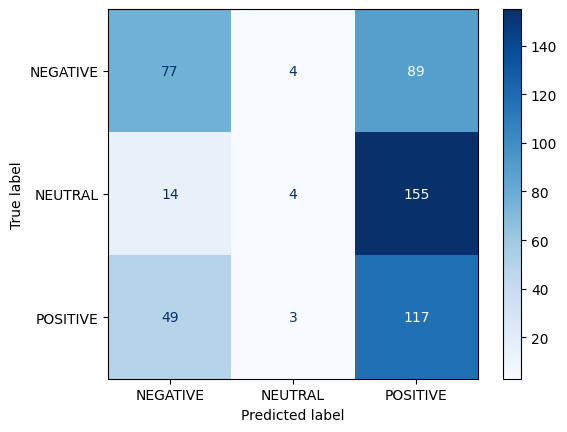

Accuracy: 0.38671875
F1 Score: 0.3253680593228188
Recall: 0.38671875
Precision: 0.4124647345599346


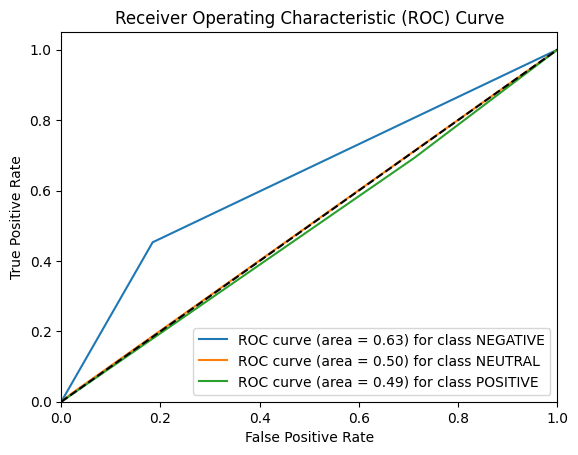

In [13]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import SGDClassifier
from matplotlib import pyplot as plt


# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=200, random_state=42)

# Fit the model on the training data
log_reg_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Compute the confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg, labels=log_reg_model.classes_)

# Display the confusion matrix
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=log_reg_model.classes_)
disp_log_reg.plot(cmap=plt.cm.Blues)
plt.show()

# Calculate accuracy, F1 score, recall, and precision
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')

print(f"Accuracy: {accuracy_log_reg}")
print(f"F1 Score: {f1_log_reg}")
print(f"Recall: {recall_log_reg}")
print(f"Precision: {precision_log_reg}")

# Binarize the labels for ROC curve
y_test_bin_log_reg = label_binarize(y_test, classes=log_reg_model.classes_)
y_pred_bin_log_reg = label_binarize(y_pred_log_reg, classes=log_reg_model.classes_)

# Compute ROC curve and ROC area for each class
fpr_log_reg = dict()
tpr_log_reg = dict()
roc_auc_log_reg = dict()
for i in range(len(log_reg_model.classes_)):
    fpr_log_reg[i], tpr_log_reg[i], _ = roc_curve(y_test_bin_log_reg[:, i], y_pred_bin_log_reg[:, i])
    roc_auc_log_reg[i] = roc_auc_score(y_test_bin_log_reg[:, i], y_pred_bin_log_reg[:, i])

# Plot ROC curve
plt.figure()
for i, label in enumerate(log_reg_model.classes_):
    plt.plot(fpr_log_reg[i], tpr_log_reg[i], label=f'ROC curve (area = {roc_auc_log_reg[i]:.2f}) for class {label}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

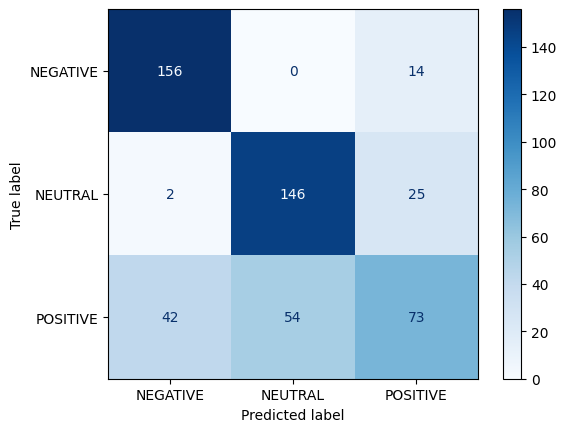

Accuracy: 0.732421875
F1 Score: 0.7159976873468475
Recall: 0.732421875
Precision: 0.7207847377232143


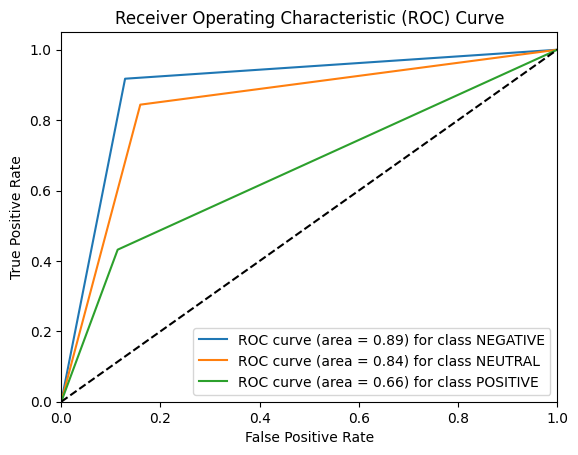

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import SGDClassifier
from matplotlib import pyplot as plt

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=7)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_knn = knn_model.predict(X_test)

# Compute the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn_model.classes_)

# Display the confusion matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)
disp_knn.plot(cmap=plt.cm.Blues)
plt.show()

# Calculate accuracy, F1 score, recall, and precision
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')

print(f"Accuracy: {accuracy_knn}")
print(f"F1 Score: {f1_knn}")
print(f"Recall: {recall_knn}")
print(f"Precision: {precision_knn}")

# Binarize the labels for ROC curve
y_test_bin_knn = label_binarize(y_test, classes=knn_model.classes_)
y_pred_bin_knn = label_binarize(y_pred_knn, classes=knn_model.classes_)

# Compute ROC curve and ROC area for each class
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(len(knn_model.classes_)):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin_knn[:, i], y_pred_bin_knn[:, i])
    roc_auc_knn[i] = roc_auc_score(y_test_bin_knn[:, i], y_pred_bin_knn[:, i])

# Plot ROC curve
plt.figure()
for i, label in enumerate(knn_model.classes_):
    plt.plot(fpr_knn[i], tpr_knn[i], label=f'ROC curve (area = {roc_auc_knn[i]:.2f}) for class {label}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

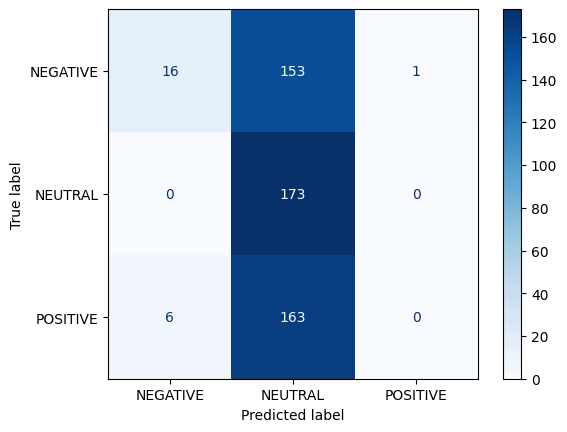

Accuracy: 0.369140625
F1 Score: 0.2319399861530715
Recall: 0.369140625
Precision: 0.3610173097927124


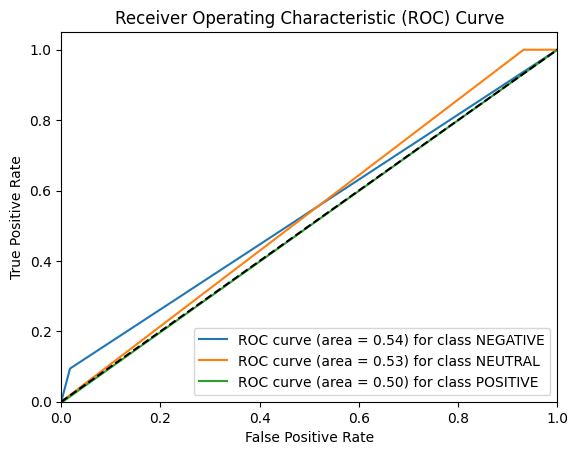

In [15]:
from sklearn.svm import SVC

# Initialize the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', probability=True)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_svm = svm_model.predict(X_test)

# Compute the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_)

# Display the confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap=plt.cm.Blues)
plt.show()

# Calculate accuracy, F1 score, recall, and precision
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')

print(f"Accuracy: {accuracy_svm}")
print(f"F1 Score: {f1_svm}")
print(f"Recall: {recall_svm}")
print(f"Precision: {precision_svm}")

# Binarize the labels for ROC curve
y_test_bin_svm = label_binarize(y_test, classes=svm_model.classes_)
y_pred_bin_svm = label_binarize(y_pred_svm, classes=svm_model.classes_)

# Compute ROC curve and ROC area for each class
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
for i in range(len(svm_model.classes_)):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_bin_svm[:, i], y_pred_bin_svm[:, i])
    roc_auc_svm[i] = roc_auc_score(y_test_bin_svm[:, i], y_pred_bin_svm[:, i])

# Plot ROC curve
plt.figure()
for i, label in enumerate(svm_model.classes_):
    plt.plot(fpr_svm[i], tpr_svm[i], label=f'ROC curve (area = {roc_auc_svm[i]:.2f}) for class {label}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

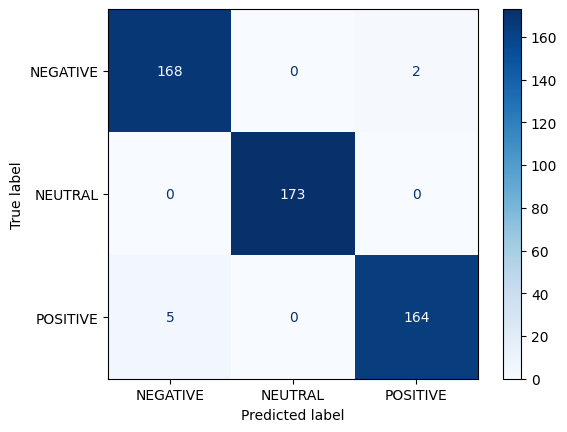

Accuracy: 0.986328125
F1 Score: 0.98632669719007
Recall: 0.986328125
Precision: 0.9864268762187478


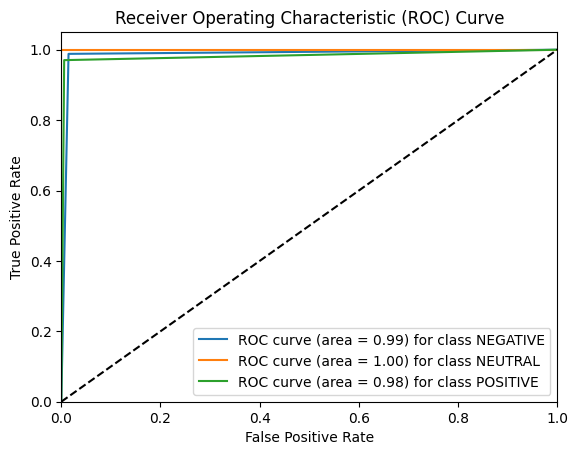

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_rf = rf_model.predict(X_test)

# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)

# Display the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.show()

# Calculate accuracy, F1 score, recall, and precision
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')

print(f"Accuracy: {accuracy_rf}")
print(f"F1 Score: {f1_rf}")
print(f"Recall: {recall_rf}")
print(f"Precision: {precision_rf}")

# Binarize the labels for ROC curve
y_test_bin_rf = label_binarize(y_test, classes=rf_model.classes_)
y_pred_bin_rf = label_binarize(y_pred_rf, classes=rf_model.classes_)

# Compute ROC curve and ROC area for each class
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(len(rf_model.classes_)):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin_rf[:, i], y_pred_bin_rf[:, i])
    roc_auc_rf[i] = roc_auc_score(y_test_bin_rf[:, i], y_pred_bin_rf[:, i])

# Plot ROC curve
plt.figure()
for i, label in enumerate(rf_model.classes_):
    plt.plot(fpr_rf[i], tpr_rf[i], label=f'ROC curve (area = {roc_auc_rf[i]:.2f}) for class {label}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

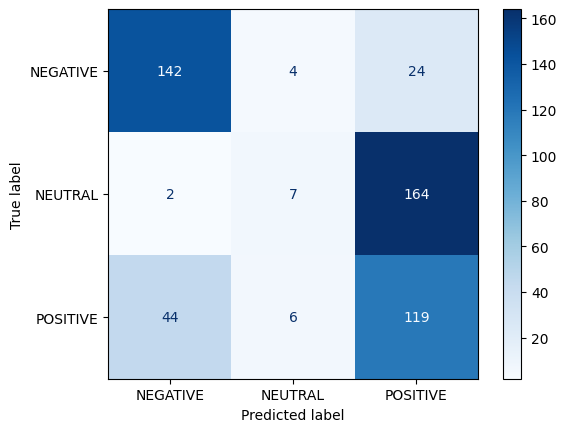

Accuracy: 0.5234375
F1 Score: 0.4533353586261394
Recall: 0.5234375
Precision: 0.5178665874204523


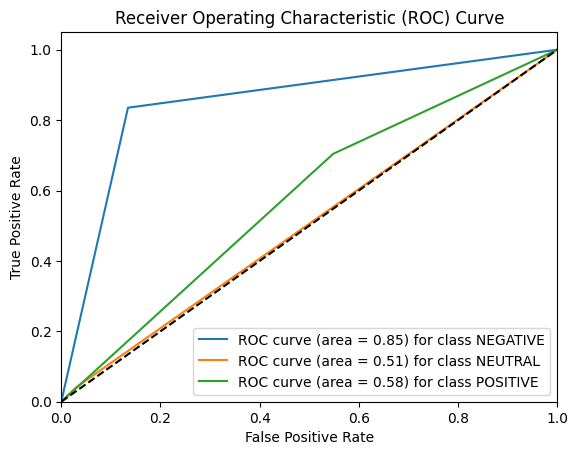

In [17]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Fit the model on the training data
ann_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_ann = ann_model.predict(X_test)

# Compute the confusion matrix
cm_ann = confusion_matrix(y_test, y_pred_ann, labels=ann_model.classes_)

# Display the confusion matrix
disp_ann = ConfusionMatrixDisplay(confusion_matrix=cm_ann, display_labels=ann_model.classes_)
disp_ann.plot(cmap=plt.cm.Blues)
plt.show()

# Calculate accuracy, F1 score, recall, and precision
accuracy_ann = accuracy_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann, average='weighted')
recall_ann = recall_score(y_test, y_pred_ann, average='weighted')
precision_ann = precision_score(y_test, y_pred_ann, average='weighted')

print(f"Accuracy: {accuracy_ann}")
print(f"F1 Score: {f1_ann}")
print(f"Recall: {recall_ann}")
print(f"Precision: {precision_ann}")

# Binarize the labels for ROC curve
y_test_bin_ann = label_binarize(y_test, classes=ann_model.classes_)
y_pred_bin_ann = label_binarize(y_pred_ann, classes=ann_model.classes_)

# Compute ROC curve and ROC area for each class
fpr_ann = dict()
tpr_ann = dict()
roc_auc_ann = dict()
for i in range(len(ann_model.classes_)):
    fpr_ann[i], tpr_ann[i], _ = roc_curve(y_test_bin_ann[:, i], y_pred_bin_ann[:, i])
    roc_auc_ann[i] = roc_auc_score(y_test_bin_ann[:, i], y_pred_bin_ann[:, i])

# Plot ROC curve
plt.figure()
for i, label in enumerate(ann_model.classes_):
    plt.plot(fpr_ann[i], tpr_ann[i], label=f'ROC curve (area = {roc_auc_ann[i]:.2f}) for class {label}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()